# Part II: FordGo Bike Dataset Exploration
## by (Akinjiola Oreoluwa Busayo)

## Investigation Overview

My presentation focuses on the best set of users to rent bikes to
In the fordgo bike dataset, i want to find:
1. The category of users that share the bike and time spent.
2. The bike sharing distribution across genders
3. The age group and gender that uses the most time with the bike each day of the week


## Dataset Overview

> The FordGo dataset contains information regarding 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# First, Make a copy of the data set
df_clean=df.copy()
#change the user_type to categorical datatype as there are only 2 unique values which can be used to categorize
#change the bike_share_for_all_trip to categorical datatype as there are only 2 unique values which can be used for grouping
#change the member_gender to categorical datatype as there are only 3 unique values which can be used to categorize
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
#to extract the rows that have all their columns complete from the df_clean dataframe
df_filter = df_clean.loc[df_clean.notnull().all(1)].copy()
#split the start_time into date_start and time_start
#split the end_time into date_end and time_end
df_filter[['date_start','time_start']] = df_filter['start_time'].str.split(' ', expand=True)
df_filter[['date_end','time_end']] = df_filter['end_time'].str.split(' ', expand=True)
#futher split the date_start and date_end into the month and day by converting it to datetime datatype
df_filter.date_start = pd.to_datetime(df_filter.date_start)
df_filter.date_end = pd.to_datetime(df_filter.date_end)
df_filter['start_month'] = df_filter.date_start.dt.month_name()
df_filter['start_day'] = df_filter.date_start.dt.day_name()
df_filter['end_month'] = df_filter.date_end.dt.month_name()
df_filter['end_day'] = df_filter.date_end.dt.day_name()
#get the age of the users from the member_birth_year
df_filter['member_birth_year'] = df_filter['member_birth_year'].astype('int')
df_filter['member_age'] = 2019-df_filter['member_birth_year']
#drop the columns start_time, end_time, end_station_latitude, end_station_longitude 
#as they are not relevant 
df_filter.drop(['start_time', 'end_time','start_station_latitude', 'start_station_longitude',
               'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What category of user share the bike?

>The category of users are splitted between the Customers and Suscribers. Do they use the bike for the whole trip?


Text(0, 0.5, 'Time spent with the bike')

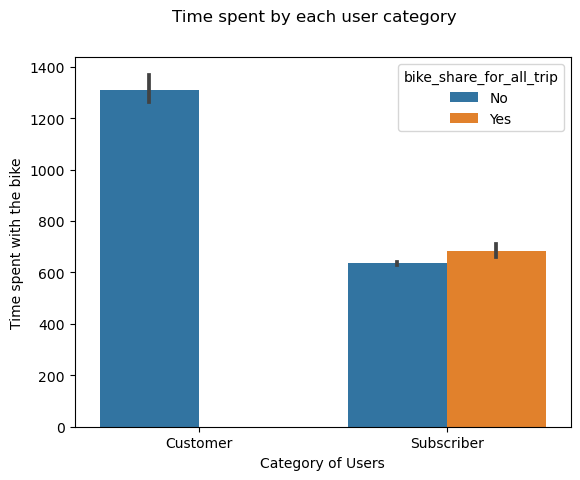

In [56]:
sb.barplot(data=df_filter, x="user_type",y="duration_sec",hue="bike_share_for_all_trip")
plt.suptitle('Time spent by each user category');
plt.xlabel('Category of Users')
plt.ylabel('Time spent with the bike')

The above chart shows that the Category of customers that spend more time with the bike they rented are the customers. They do not share the bike during their trip. The subscribers share the bikes during their trip which results in lesser time spent by each subscriber on the bike

## The distribution of the genders that rent the bikes
From the exploratory analysis there are different genders that rents the bike. Do all of them share the bikes on their trip?

Text(0, 0.5, 'Number of Users')

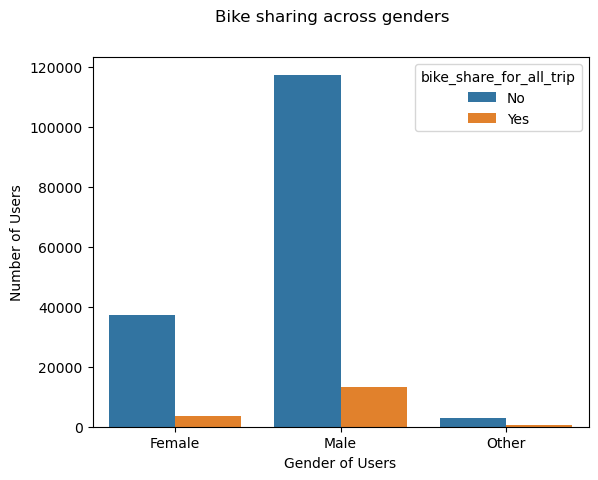

In [64]:
sb.countplot(data=df_filter, x="member_gender",hue="bike_share_for_all_trip")
plt.suptitle('Bike sharing across genders');
plt.xlabel('Gender of Users')
plt.ylabel('Number of Users')

## The age group and gender that uses the most time with the bike each day of the week



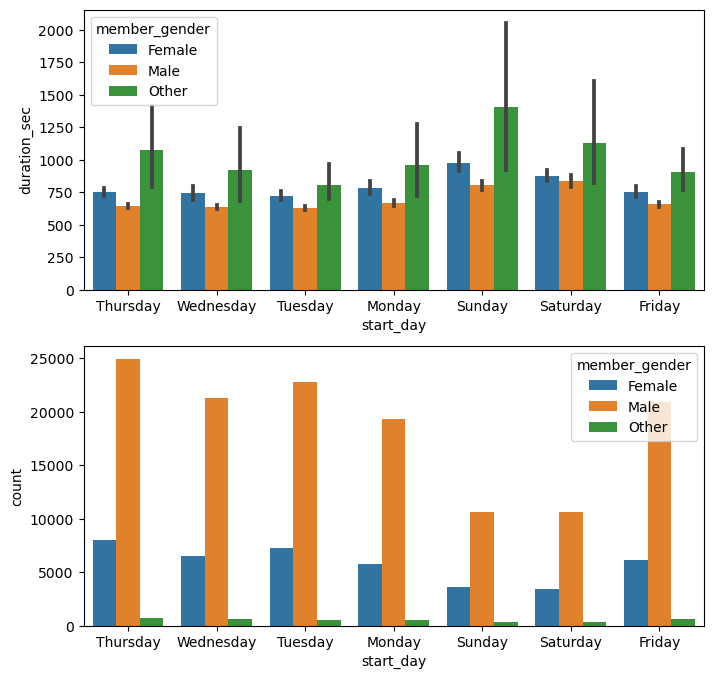

In [73]:

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
sb.barplot(data = df_filter, x = 'start_day',y="duration_sec",hue="member_gender" , ax = ax[0])
sb.countplot(data = df_filter, x = 'start_day', hue="member_gender", ax = ax[1])
plt.show()

The above chart shows that the users that are males use the rent the most bike each day of the week but do not spend the most time with the bikes

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt